# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Boarding was difficult caus...
1,✅ Trip Verified | Boarding started with a del...
2,✅ Trip Verified | Absolutely horrible custome...
3,Not Verified | BA is not what it used to be! ...
4,"✅ Trip Verified | BA First, it's not even the..."


In [6]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df

,reviews
0,✅ Trip Verified | Boarding was difficult caus...
1,✅ Trip Verified | Boarding started with a del...
2,✅ Trip Verified | Absolutely horrible custome...
3,Not Verified | BA is not what it used to be! ...
4,"✅ Trip Verified | BA First, it's not even the..."
...,...
995,✅ Trip Verified | London to Vancouver. Check ...
996,✅ Trip Verified | The First Class zone at Heat...
997,✅ Trip Verified | I had a miserable experienc...
998,✅ Trip Verified | Leeds Bradford to Las Vegas...


In [11]:
df.reviews = df.reviews.str.split('|', expand = True)
df

,reviews
0,Boarding was difficult caused by vast majori...
1,Boarding started with a delay of some 20 min...
2,Absolutely horrible customer service - will ...
3,BA is not what it used to be! As much as I l...
4,"BA First, it's not even the best business cl..."
...,...
995,London to Vancouver. Check in agent very hel...
996,The First Class zone at Heathrow T5 and the C...
997,I had a miserable experience in first class ...
998,Leeds Bradford to Las Vegas via Heathrow. Cu...


In [12]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...
1,Boarding started with a delay of some 20 min...,Boarding started with a delay of some minutes...
2,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...
3,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...
4,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...


In [13]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/egifermana/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/egifermana/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/egifermana/nltk_data...


In [14]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/egifermana/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/egifermana/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (..."
1,Boarding started with a delay of some 20 min...,Boarding started with a delay of some minutes...,"[(Boarding, n), (started, v), (delay, n), (min..."
2,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...,"[(Absolutely, r), (horrible, a), (customer, n)..."
3,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...,"[(BA, n), (used, v), (much, a), (like, v), (on..."
4,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b..."


In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (...",Boarding difficult cause vast majority passe...
1,Boarding started with a delay of some 20 min...,Boarding started with a delay of some minutes...,"[(Boarding, n), (started, v), (delay, n), (min...",Boarding start delay minute everybody could ...
2,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...,"[(Absolutely, r), (horrible, a), (customer, n)...",Absolutely horrible customer service never f...
3,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...,"[(BA, n), (used, v), (much, a), (like, v), (on...",BA use much like onboard crew check staff la...
4,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b...",BA First even best business class sky Cabin ...


In [16]:
df[['reviews', 'Lemma']]

,reviews,Lemma
0,Boarding was difficult caused by vast majori...,Boarding difficult cause vast majority passe...
1,Boarding started with a delay of some 20 min...,Boarding start delay minute everybody could ...
2,Absolutely horrible customer service - will ...,Absolutely horrible customer service never f...
3,BA is not what it used to be! As much as I l...,BA use much like onboard crew check staff la...
4,"BA First, it's not even the best business cl...",BA First even best business class sky Cabin ...
...,...,...
995,London to Vancouver. Check in agent very hel...,London Vancouver Check agent helpful search ...
996,The First Class zone at Heathrow T5 and the C...,First Class zone Heathrow Concorde Lounge go...
997,I had a miserable experience in first class ...,miserable experience first class London Chic...
998,Leeds Bradford to Las Vegas via Heathrow. Cu...,Leeds Bradford Las Vegas via Heathrow Custom...


In [17]:
!pip3 install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (...",Boarding difficult cause vast majority passe...,0.9343,Positive
1,Boarding started with a delay of some 20 min...,Boarding started with a delay of some minutes...,"[(Boarding, n), (started, v), (delay, n), (min...",Boarding start delay minute everybody could ...,0.9509,Positive
2,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...,"[(Absolutely, r), (horrible, a), (customer, n)...",Absolutely horrible customer service never f...,-0.7680,Negative
3,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...,"[(BA, n), (used, v), (much, a), (like, v), (on...",BA use much like onboard crew check staff la...,0.9532,Positive
4,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b...",BA First even best business class sky Cabin ...,0.4148,Neutral


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    481
Negative    412
Neutral     107
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x305599890>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.4241423504541015, -1.014940031012311, 'Negative'),
  Text(1.274442496352635, -0.4453047535008627, 'Neutral')],
 [Text(0.03579288117029276, 0.5989314398639708, '48.1%'),
  Text(-0.2313503729749644, -0.5536036532794422, '41.2%'),
  Text(0.8024267569627701, -0.2803770670190617, '10.7%')])

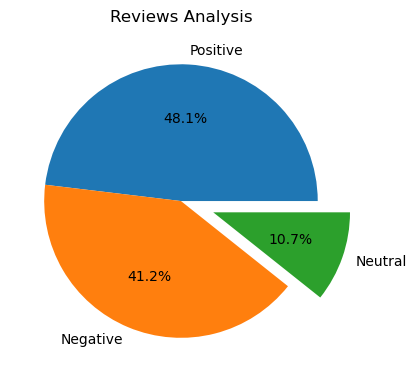

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize = (15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct = '%1.1f%%', shadow = False)

In [21]:
df.to_csv('BA_reviews.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.0 MB/s eta 0:00:00a 0:00:01


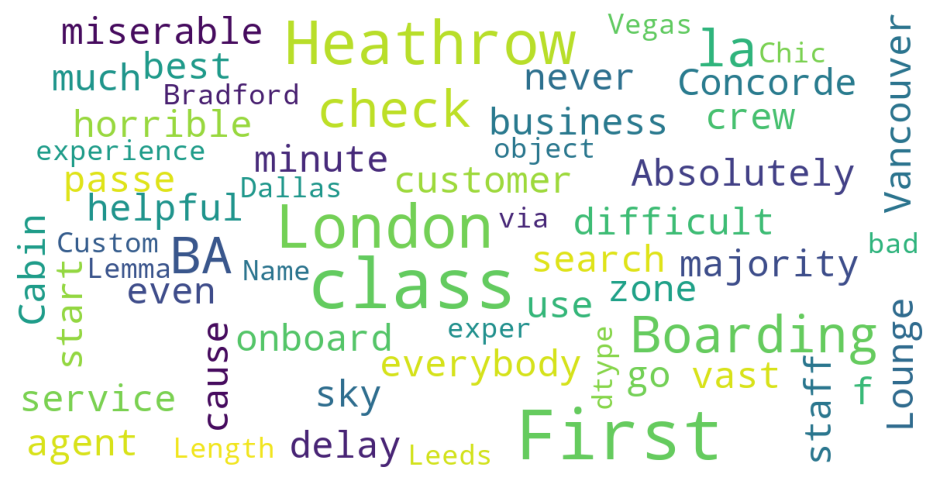

In [23]:
!pip3 install wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize = (12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)